In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #This sets seabon as the defualtn for all plots 
#but do play around and see when you remove seaborn what happens
 

In [23]:
train = pd.read_csv('/home/dev/Desktop/Titanic/train.csv')
test = pd.read_csv('/home/dev/Desktop/Titanic/test.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.shape


(891, 12)

In [27]:
test.shape

(418, 11)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
def bar_chart(feature):
        survived = train[train['Survived']==1][feature].value_counts()
        dead = train[train['Survived']==0][feature].value_counts()
        df = pd.DataFrame([survived,dead])
        df.index = ['Survived','Dead']
        df.plot(kind='bar', stacked=True, figsize=(10,5))

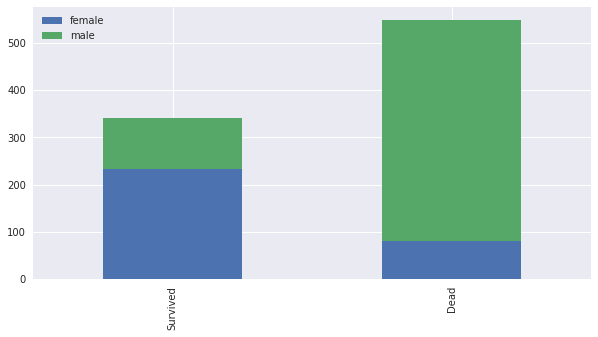

In [38]:
bar_chart('Sex')

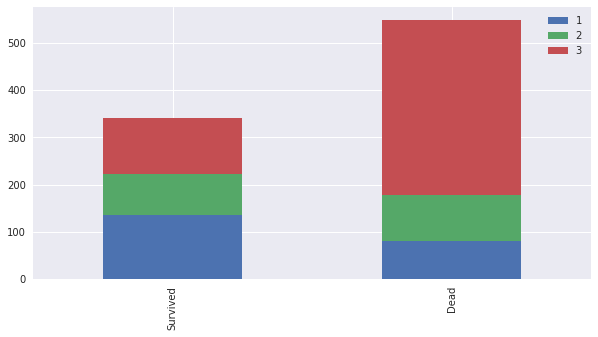

In [40]:
bar_chart('Pclass')

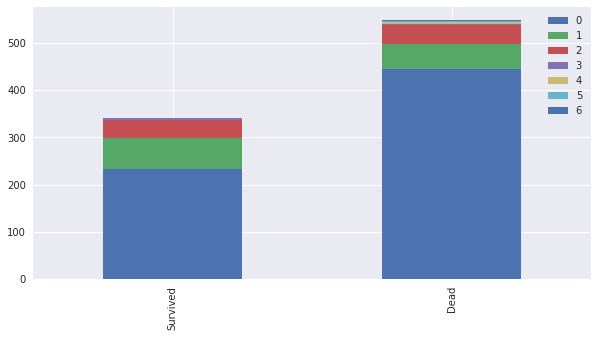

In [42]:
bar_chart('Parch')

In [46]:
train_test_data = [train, test] #combine the dataset together

for dataset in train_test_data:
    dataset['Title'] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [49]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Ms            1
Countess      1
Lady          1
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [52]:
test['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Ms            1
Countess      1
Lady          1
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [57]:
title_mapping = {"Mr": 0, "Miss":1, "Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,
                 "Mlle":3,"Countess":3,"Ms":3,"Lady":3,"Johnkheer":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


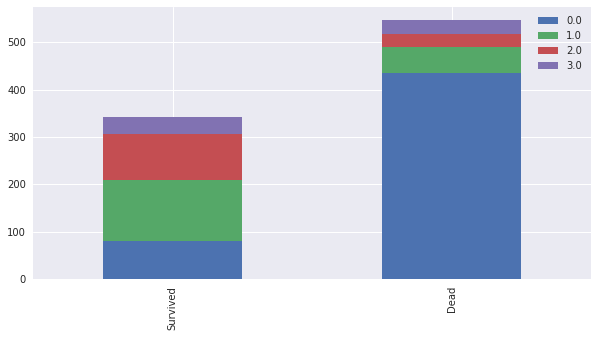

In [63]:
bar_chart('Title')

In [67]:
#You can only drop a column attribute once
#and we dont want errors right soo......
#train.drop('Name', axis=1, inplace=True)
#test.drop('Name', axis=1, inplace=True)

In [68]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

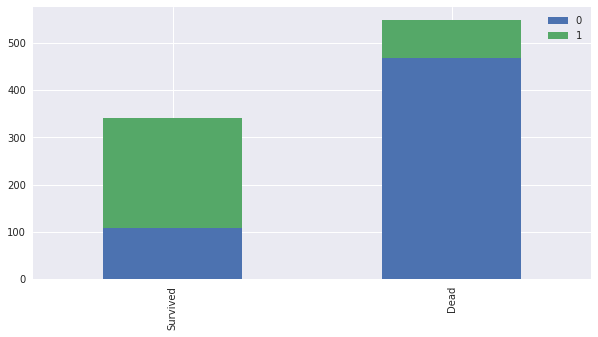

In [69]:
bar_chart('Sex')